In [3]:
# import packages
import matplotlib.pyplot as pl
import scanpy as sc
import scvelo as scv
import loompy as lmp
import anndata
import numpy as np
import pandas as pd
import scanpy as sc
import cellrank as cr
import warnings
import seaborn as sns
import os
import sys
from anndata import AnnData


# set verbosity levels
sc.settings.verbosity = 2
cr.settings.verbosity = 2
scv.settings.verbosity = 3 

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


In [36]:
#set color palette
colors = sns.color_palette('bright', 9)
colors
TNcdict = {'Tumor Corticotrophs':colors[3], 'Normal Corticotrophs':colors[0], "FSC":colors[4]}
ct_dict = {"corticotrophs": colors[3],
          "somatotrophs": colors[0],
          "lactotrophs": colors[1],
          "gonadotrophs": colors[2],
          "fsc": colors[4],
          "endothelial": colors[5],
          "pericytes": colors[6],
          "leukocyte": colors[7],
          "Unknown": colors[8]}


color_macro = ["tab:brown", "tab:red","tab:gray", "tab:orange", "tab:purple", "tab:pink", "tab:blue", "tab:green"]

color_macro


['tab:brown',
 'tab:red',
 'tab:gray',
 'tab:orange',
 'tab:purple',
 'tab:pink',
 'tab:blue',
 'tab:green']

In [5]:
colors

[(0.00784313725490196, 0.24313725490196078, 1.0),
 (1.0, 0.48627450980392156, 0.0),
 (0.10196078431372549, 0.788235294117647, 0.2196078431372549),
 (0.9098039215686274, 0.0, 0.043137254901960784),
 (0.5450980392156862, 0.16862745098039217, 0.8862745098039215),
 (0.6235294117647059, 0.2823529411764706, 0.0),
 (0.9450980392156862, 0.2980392156862745, 0.7568627450980392),
 (0.6392156862745098, 0.6392156862745098, 0.6392156862745098),
 (1.0, 0.7686274509803922, 0.0)]

# Load and Merge Normal and Tumor Data with Spliced and Unspliced Counts

In [8]:

# import normal data and merge the spliced/unspliced counts
adata_P2_N=scv.read("/Users/bhattda/Library/CloudStorage/OneDrive-NationalInstitutesofHealth/new_tumor_data/P2_N_GEX.h5ad")
ldata_P2_N=scv.read("/Users/bhattda/Library/CloudStorage/OneDrive-NationalInstitutesofHealth/new_tumor_data/P2_N_outs_gex_possorted_bam_OXCVJ.loom", cache=True)
scv.utils.clean_obs_names(adata_P2_N)
scv.utils.clean_obs_names(ldata_P2_N)
adata_P2_N = scv.utils.merge(adata_P2_N, ldata_P2_N)
adata_P2_N.obs["Type"] = "Normal Corticotrophs" #Label for future reference


# import tumor data and merge the spliced/unspliced counts

adata_P2_T=scv.read("/Users/bhattda/Library/CloudStorage/OneDrive-NationalInstitutesofHealth/new_tumor_data/P2_T_GEX.h5ad")
ldata_P2_T=scv.read("/Users/bhattda/Library/CloudStorage/OneDrive-NationalInstitutesofHealth/new_tumor_data/P2_T_outs_gex_possorted_bam_ZXSXI.loom",cache=True)
scv.utils.clean_obs_names(adata_P2_T)
scv.utils.clean_obs_names(ldata_P2_T)
adata_P2_T = scv.utils.merge(adata_P2_T, ldata_P2_T)
adata_P2_T.obs["Type"] = "Tumor Corticotrophs" #Label for future reference

#merge Normal and Tumor data
adata=sc.concat([adata_P2_N, adata_P2_T]) 

#save combined anndata file 
sc.write("adata_original.h5ad", adata) 

... reading from cache file cache/Users-bhattda-Library-CloudStorage-OneDrive-NationalInstitutesofHealth-new_tumor_data-P2_N_outs_gex_possorted_bam_OXCVJ.h5ad


/Users/bhattda/anaconda3/envs/cellrank/lib/python3.10/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


... reading from cache file cache/Users-bhattda-Library-CloudStorage-OneDrive-NationalInstitutesofHealth-new_tumor_data-P2_T_outs_gex_possorted_bam_ZXSXI.h5ad


/Users/bhattda/anaconda3/envs/cellrank/lib/python3.10/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Users/bhattda/anaconda3/envs/cellrank/lib/python3.10/site-packages/anndata/_core/anndata.py:1828: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/Users/bhattda/anaconda3/envs/cellrank/lib/python3.10/site-packages/anndata/_core/anndata.py:1828: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


# All Cell Type Analysis

<font size="5">Preproccess data and compute UMAP</font>

extracting highly variable genes


/Users/bhattda/anaconda3/envs/cellrank/lib/python3.10/site-packages/anndata/_core/anndata.py:1828: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


    finished (0:00:00)


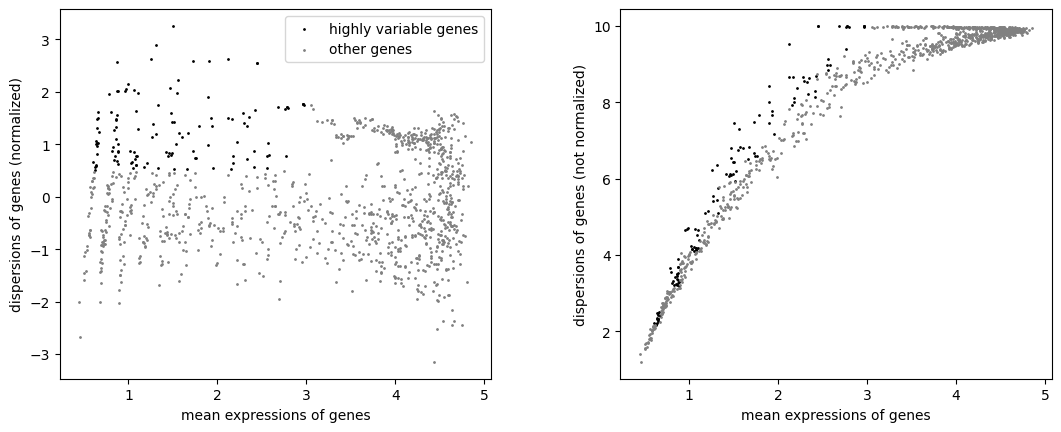

computing neighbors
    using 'X_pca' with n_pcs = 30
    finished (0:00:20)
computing UMAP
    finished (0:00:07)


/Users/bhattda/anaconda3/envs/cellrank/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:163: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = copy(get_cmap(cmap))
/Users/bhattda/anaconda3/envs/cellrank/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


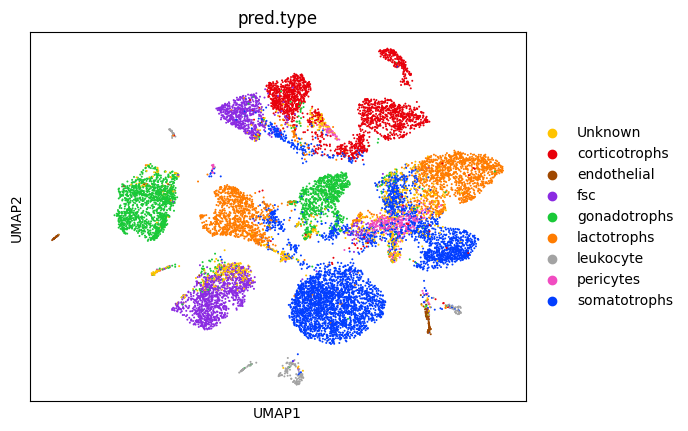

In [9]:
adata= sc.read_h5ad("adata_original.h5ad")
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)
sc.pl.highly_variable_genes(adata)
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=30)
sc.tl.umap(adata)
sc.pl.umap(adata, color='pred.type', palette=ct_dict)

<font size="5">Compute RNA Velocity</font>

In [10]:
scv.pp.filter_and_normalize(adata, min_shared_counts =2, n_top_genes=2000)
scv.pp.moments(adata,n_pcs=30, n_neighbors=30)
scv.tl.recover_dynamics(adata, n_jobs=8)
scv.tl.velocity(adata, mode= "dynamical")
scv.tl.velocity_graph(adata)

/Users/bhattda/anaconda3/envs/cellrank/lib/python3.10/site-packages/anndata/_core/anndata.py:1828: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/Users/bhattda/anaconda3/envs/cellrank/lib/python3.10/site-packages/anndata/_core/anndata.py:1828: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/Users/bhattda/anaconda3/envs/cellrank/lib/python3.10/site-packages/anndata/_core/anndata.py:1828: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/Users/bhattda/anaconda3/envs/cellrank/lib/python3.10/site-packages/anndata/_core/anndata.py:1828: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/Users/bhattda/anaconda3/envs/cellrank/lib/python3.10/site-p

Filtered out 150 genes that are detected 2 counts (shared).
Normalized count data: spliced, unspliced.
Skip filtering by dispersion since number of variables are less than `n_top_genes`.
computing neighbors
    finished (0:00:05) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:00) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)
recovering dynamics (using 8/8 cores)


  0%|          | 0/72 [00:00<?, ?gene/s]

/Users/bhattda/anaconda3/envs/cellrank/lib/python3.10/site-packages/scvelo/tools/dynamical_model.py:721: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  np.array([dm.alpha, dm.beta, dm.gamma, dm.pars[:3]]) / dm.m[-1]
/Users/bhattda/anaconda3/envs/cellrank/lib/python3.10/site-packages/scvelo/tools/dynamical_model.py:724: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  np.array([dm.t, dm.tau, dm.t_, dm.pars[4]]) * dm.m[-1]


    finished (0:00:41) --> added 
    'fit_pars', fitted parameters for splicing dynamics (adata.var)
computing velocities


/Users/bhattda/anaconda3/envs/cellrank/lib/python3.10/site-packages/anndata/_core/anndata.py:1828: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


    finished (0:00:01) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
computing velocity graph (using 1/8 cores)


  0%|          | 0/14567 [00:00<?, ?cells/s]

/Users/bhattda/anaconda3/envs/cellrank/lib/python3.10/site-packages/scvelo/core/_parallelize.py:138: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  res = np.array(res) if as_array else res


    finished (0:00:08) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)


<font size="5">Display RNA Velocity</font>

computing velocity embedding
    finished (0:00:03) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)


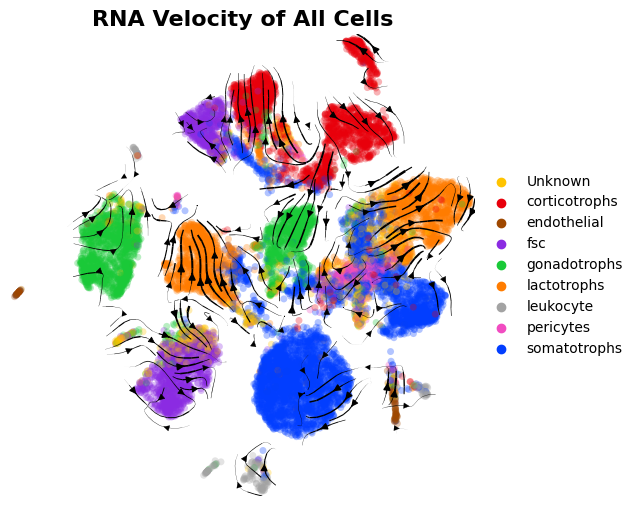

In [11]:
fig, ax1 = pl.subplots(1,1,figsize=(6,6))
ax1_dict = scv.pl.velocity_embedding_stream(adata, basis= "umap", color="pred.type",  size = 100, dpi =600,
                                            legend_loc="top right", ax= ax1, show = False, palette=ct_dict)
ax1.set_title("RNA Velocity of All Cells", fontweight="bold", fontsize=16)
    
pl.savefig("All_Cell_RNA_Velocity.png")

# FSC and Corticotrophs Analysis

<font size="5">Import, Filter for FSC and Coritcotrophs,  and Preprocess Data</font>

In [ ]:
adata= sc.read_h5ad("adata_original.h5ad")
adata = adata[(adata.obs['pred.type'] == "corticotrophs") | (adata.obs['pred.type'] == "fsc")    ]
adata

In [13]:
#label FSC, Tumor Corticotrophs and Normal Corticotrophs
adata.obs["cell_type"] = None
condtion =(adata.obs["pred.type"] =='corticotrophs')& (adata.obs["Type"] == "Normal Corticotrophs")
adata.obs.loc[condtion, "cell_type"] = "Normal Corticotrophs"
adata.obs["cell_type"]

condtion =(adata.obs["pred.type"] =='corticotrophs')& (adata.obs["Type"] == "Tumor Corticotrophs")
adata.obs.loc[condtion, "cell_type"] = "Tumor Corticotrophs"
adata.obs["cell_type"]

condtion =(adata.obs["pred.type"] =='fsc')
adata.obs.loc[condtion, "cell_type"] = "FSC"
adata.obs["cell_type"]

/var/folders/1d/74b6xrld7dn11xmjy_3mbg6c5mwjcv/T/ipykernel_26420/3723910287.py:1: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs["cell_type"] = None
/Users/bhattda/anaconda3/envs/cellrank/lib/python3.10/site-packages/anndata/_core/anndata.py:1828: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/Users/bhattda/anaconda3/envs/cellrank/lib/python3.10/site-packages/anndata/_core/anndata.py:1828: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


AAACAGCCAAGG                     FSC
AAACATGCACAT                     FSC
AAACCAACAATT                     FSC
AAACGCGCATTG    Normal Corticotrophs
AAACGGATCACT                     FSC
                        ...         
TTTGCGACATGC     Tumor Corticotrophs
TTTGGTGCAAAT     Tumor Corticotrophs
TTTGGTGCACAC     Tumor Corticotrophs
TTTGTGAAGCAA     Tumor Corticotrophs
TTTGTGTTCGTA                     FSC
Name: cell_type, Length: 3804, dtype: object

extracting highly variable genes
    finished (0:00:00)


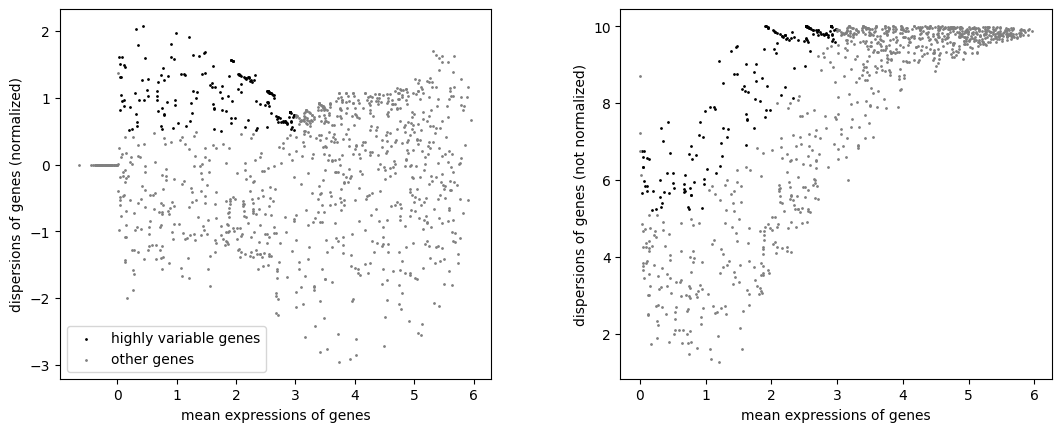

computing neighbors
    using 'X_pca' with n_pcs = 30
    finished (0:00:01)
computing UMAP
    finished (0:00:04)


/Users/bhattda/anaconda3/envs/cellrank/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:163: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = copy(get_cmap(cmap))
/Users/bhattda/anaconda3/envs/cellrank/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


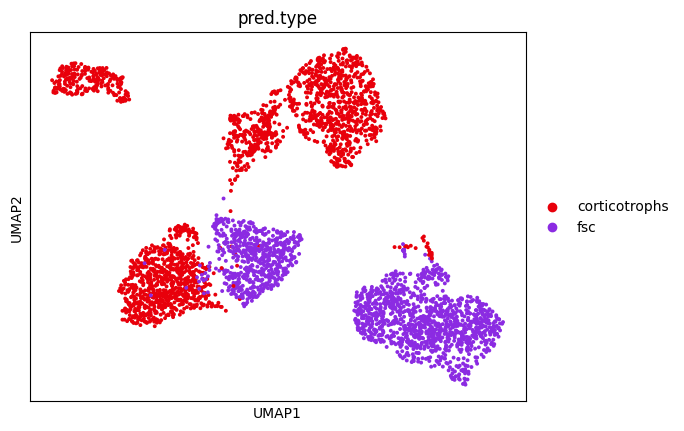

In [14]:
#Preproccess data and compute UMAP
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)
sc.pl.highly_variable_genes(adata)
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=30)
sc.tl.umap(adata)
sc.pl.umap(adata, color='pred.type', palette=ct_dict)

/Users/bhattda/anaconda3/envs/cellrank/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:163: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = copy(get_cmap(cmap))
/Users/bhattda/anaconda3/envs/cellrank/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


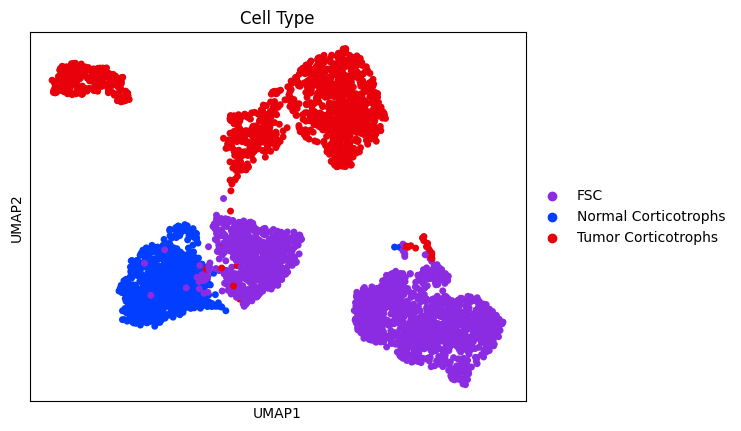

In [15]:
sc.pl.umap(adata, color='cell_type', title="Cell Type", save="umap.png", size=100, palette=TNcdict)

<font size="5">Compute RNA Velocity</font>

In [16]:
scv.pp.filter_and_normalize(adata, min_shared_counts =2, n_top_genes=2000)
scv.pp.moments(adata,n_pcs=30, n_neighbors=30)
scv.tl.recover_dynamics(adata, n_jobs=8)
scv.tl.velocity(adata, mode= "dynamical")
scv.tl.velocity_graph(adata)

/Users/bhattda/anaconda3/envs/cellrank/lib/python3.10/site-packages/anndata/_core/anndata.py:1828: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/Users/bhattda/anaconda3/envs/cellrank/lib/python3.10/site-packages/anndata/_core/anndata.py:1828: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/Users/bhattda/anaconda3/envs/cellrank/lib/python3.10/site-packages/anndata/_core/anndata.py:1828: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/Users/bhattda/anaconda3/envs/cellrank/lib/python3.10/site-packages/anndata/_core/anndata.py:1828: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/Users/bhattda/anaconda3/envs/cellrank/lib/python3.10/site-p

Filtered out 325 genes that are detected 2 counts (shared).
Normalized count data: spliced, unspliced.
Skip filtering by dispersion since number of variables are less than `n_top_genes`.
computing neighbors
    finished (0:00:00) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:00) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)
recovering dynamics (using 8/8 cores)


  0%|          | 0/15 [00:00<?, ?gene/s]

/Users/bhattda/anaconda3/envs/cellrank/lib/python3.10/site-packages/scvelo/tools/dynamical_model.py:721: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  np.array([dm.alpha, dm.beta, dm.gamma, dm.pars[:3]]) / dm.m[-1]
/Users/bhattda/anaconda3/envs/cellrank/lib/python3.10/site-packages/scvelo/tools/dynamical_model.py:724: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  np.array([dm.t, dm.tau, dm.t_, dm.pars[4]]) * dm.m[-1]


    finished (0:00:04) --> added 
    'fit_pars', fitted parameters for splicing dynamics (adata.var)
computing velocities
    finished (0:00:00) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
computing velocity graph (using 1/8 cores)


/Users/bhattda/anaconda3/envs/cellrank/lib/python3.10/site-packages/anndata/_core/anndata.py:1828: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


  0%|          | 0/3804 [00:00<?, ?cells/s]

/Users/bhattda/anaconda3/envs/cellrank/lib/python3.10/site-packages/scvelo/core/_parallelize.py:138: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  res = np.array(res) if as_array else res


    finished (0:00:01) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)


<font size="5">Display RNA Velocity</font>

computing velocity embedding
    finished (0:00:00) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)


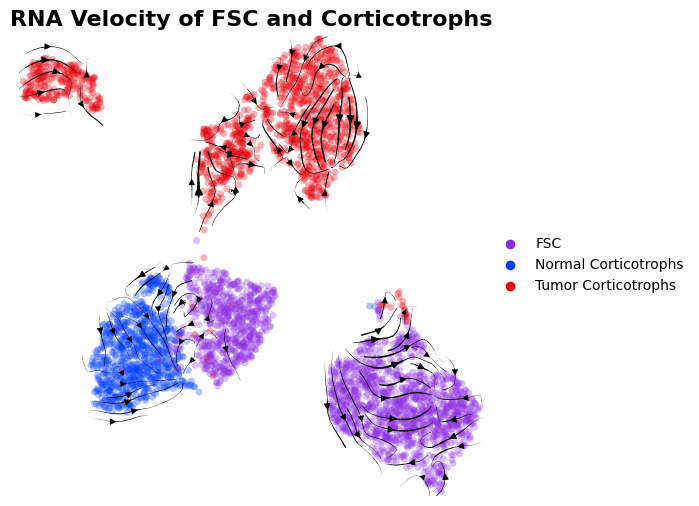

In [17]:
fig, ax1 = pl.subplots(1,1,figsize=(6,6))
ax1_dict = scv.pl.velocity_embedding_stream(adata, basis= "umap", color="cell_type",  size = 100, dpi =600,
                                            legend_loc="top right", ax= ax1, show = False, palette=TNcdict)
ax1.set_title("RNA Velocity of FSC and Corticotrophs", fontweight="bold", fontsize=16)

    
pl.savefig("FSC_and_Corticotrophs_RNA_Velocity.png")

# Corticotrophs Analysis

<font size="5">Import, Filter for Coritcotrophs, and Preprocess Data</font>

In [21]:
adata= sc.read_h5ad("adata_original.h5ad")
adata = adata[(adata.obs['pred.type'] == "corticotrophs")  ]
adata

/Users/bhattda/anaconda3/envs/cellrank/lib/python3.10/site-packages/anndata/_core/anndata.py:1828: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


View of AnnData object with n_obs × n_vars = 2022 × 1099
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'anno', 'percent.mt', 'pANN_0.25_0.09_0', 'DF.classifications_0.25_0.09_0', 'pred.type', 'RNA_snn_res.0.5', 'seurat_clusters', 'sample_batch', 'initial_size_unspliced', 'initial_size_spliced', 'initial_size', 'Type'
    obsm: 'X_pca', 'X_umap'
    layers: 'ambiguous', 'matrix', 'spliced', 'unspliced'

extracting highly variable genes
    finished (0:00:00)


/Users/bhattda/anaconda3/envs/cellrank/lib/python3.10/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value
/Users/bhattda/anaconda3/envs/cellrank/lib/python3.10/site-packages/anndata/_core/anndata.py:1828: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/Users/bhattda/anaconda3/envs/cellrank/lib/python3.10/site-packages/anndata/_core/anndata.py:1828: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


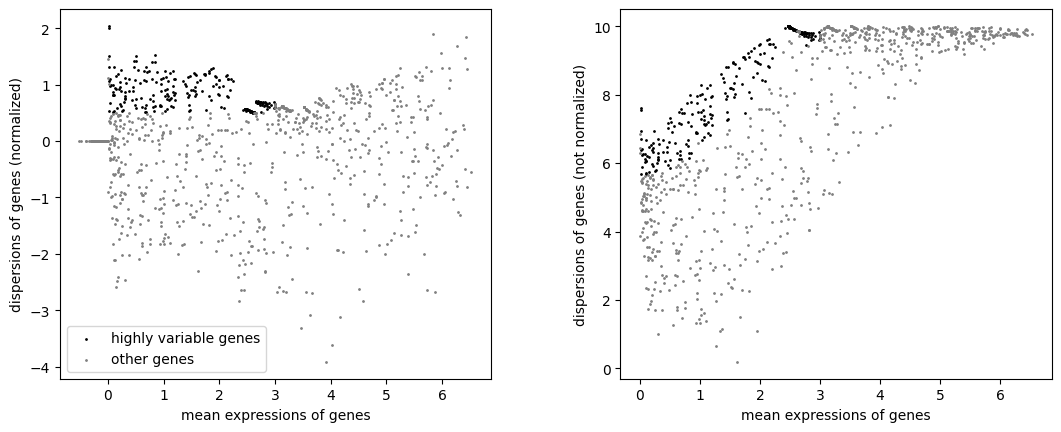

computing neighbors
    using 'X_pca' with n_pcs = 30
    finished (0:00:00)
computing UMAP
    finished (0:00:02)


/Users/bhattda/anaconda3/envs/cellrank/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:163: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = copy(get_cmap(cmap))
/Users/bhattda/anaconda3/envs/cellrank/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


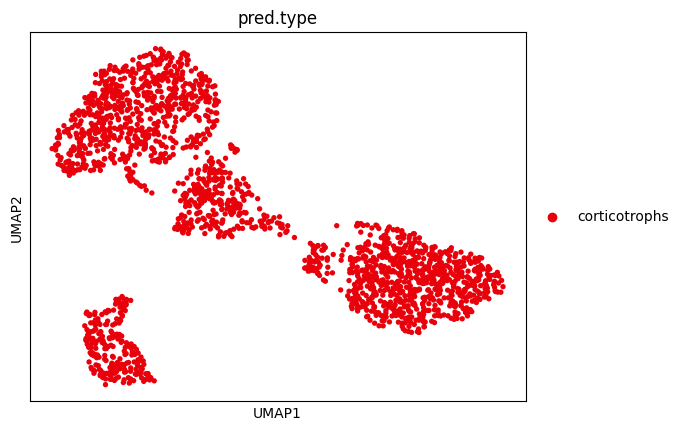

In [22]:
#preprocess and compute UMAP
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)
sc.pl.highly_variable_genes(adata)
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=30)
sc.tl.umap(adata)
sc.pl.umap(adata, color='pred.type', palette=ct_dict)

<font size="5">Compute RNA Velocity</font>

In [23]:
scv.pp.filter_and_normalize(adata, min_shared_counts =20, n_top_genes=2000)
scv.pp.moments(adata,n_pcs=30, n_neighbors=30)
scv.tl.recover_dynamics(adata, n_jobs=8)
scv.tl.velocity(adata, mode= "dynamical")
scv.tl.velocity_graph(adata)

/Users/bhattda/anaconda3/envs/cellrank/lib/python3.10/site-packages/anndata/_core/anndata.py:1828: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/Users/bhattda/anaconda3/envs/cellrank/lib/python3.10/site-packages/anndata/_core/anndata.py:1828: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/Users/bhattda/anaconda3/envs/cellrank/lib/python3.10/site-packages/anndata/_core/anndata.py:1828: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/Users/bhattda/anaconda3/envs/cellrank/lib/python3.10/site-packages/anndata/_core/anndata.py:1828: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/Users/bhattda/anaconda3/envs/cellrank/lib/python3.10/site-p

Filtered out 729 genes that are detected 20 counts (shared).
Normalized count data: spliced, unspliced.
Skip filtering by dispersion since number of variables are less than `n_top_genes`.
computing neighbors
    finished (0:00:00) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:00) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)
recovering dynamics (using 8/8 cores)
    finished (0:00:05) --> added 
    'fit_pars', fitted parameters for splicing dynamics (adata.var)
computing velocities
    finished (0:00:00) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
computing velocity graph (using 1/8 cores)


/Users/bhattda/anaconda3/envs/cellrank/lib/python3.10/site-packages/scvelo/tools/dynamical_model.py:721: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  np.array([dm.alpha, dm.beta, dm.gamma, dm.pars[:3]]) / dm.m[-1]
/Users/bhattda/anaconda3/envs/cellrank/lib/python3.10/site-packages/scvelo/tools/dynamical_model.py:724: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  np.array([dm.t, dm.tau, dm.t_, dm.pars[4]]) * dm.m[-1]
/Users/bhattda/anaconda3/envs/cellrank/lib/python3.10/site-packages/anndata/_core/anndata.py:1828: UserWarning: Observation names are n

  0%|          | 0/2022 [00:00<?, ?cells/s]

    finished (0:00:01) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)


/Users/bhattda/anaconda3/envs/cellrank/lib/python3.10/site-packages/scvelo/core/_parallelize.py:138: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  res = np.array(res) if as_array else res


In [24]:
vk = cr.kernels.VelocityKernel(adata)
vk.compute_transition_matrix()


Computing transition matrix using `'deterministic'` model


  0%|          | 0/2022 [00:00<?, ?cell/s]

Using `softmax_scale=1.4469`


  0%|          | 0/2022 [00:00<?, ?cell/s]

    Finish (0:00:01)


VelocityKernel[n=2022, model='deterministic', similarity='correlation', softmax_scale=1.447]

<font size="5">Display RNA Velocity</font>

Using precomputed projection `adata.obsm['T_fwd_umap']`


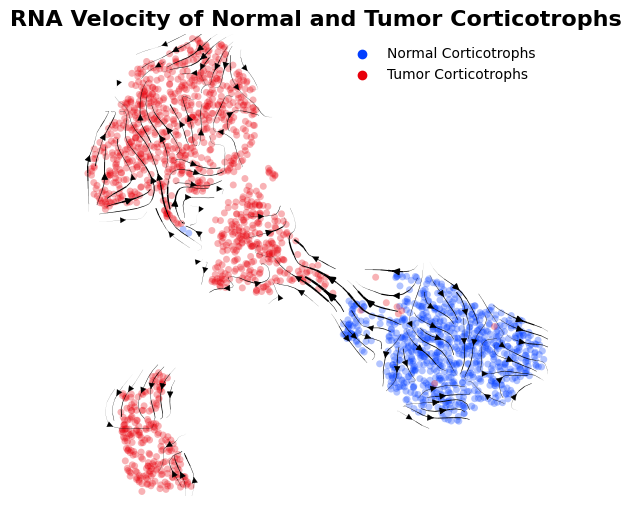

In [54]:
fig, ax1 = pl.subplots(1,1,figsize=(6,6))
ax1_dict = vk.plot_projection( color="Type", size = 100, 
                   legend_loc='best',fontsize=16, legend_fontoutline = 5, ax= ax1, show= False,palette=TNcdict)
ax1.set_title("RNA Velocity of Normal and Tumor Corticotrophs", fontweight="bold", fontsize=16)
pl.savefig("Corticotrophs_RNA_Velocity.png")


Using precomputed projection `adata.obsm['T_fwd_umap']`


/Users/bhattda/anaconda3/envs/cellrank/lib/python3.10/site-packages/scvelo/plotting/utils.py:869: MatplotlibDeprecationWarning: The draw_all function was deprecated in Matplotlib 3.6 and will be removed two minor releases later. Use fig.draw_without_rendering() instead.
  cb.draw_all()


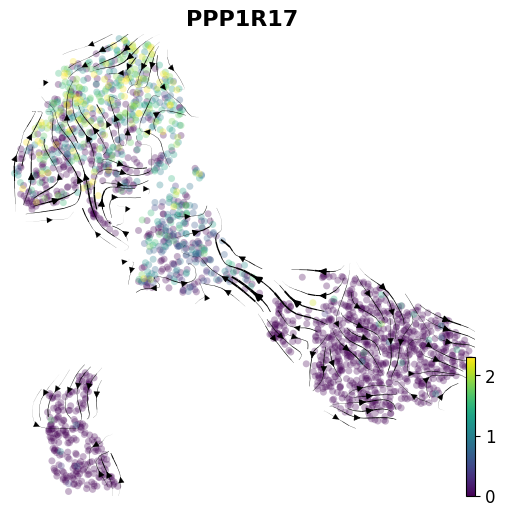

In [28]:
#embed RNA velocity over UMAP of gene expression of PPP1R17
fig, ax1 = pl.subplots(1,1,figsize=(6,6))
ax1_dict = vk.plot_projection( color="PPP1R17", size = 100, 
                   legend_loc='best',fontsize=16, legend_fontoutline = 5, ax= ax1, show= False, vmax = 2.3)
ax1.set_title("PPP1R17", fontweight="bold", fontsize=16)
pl.savefig("PPP1R17_RNA_Velocity.png")

Using precomputed projection `adata.obsm['T_fwd_umap']`


/Users/bhattda/anaconda3/envs/cellrank/lib/python3.10/site-packages/scvelo/plotting/utils.py:869: MatplotlibDeprecationWarning: The draw_all function was deprecated in Matplotlib 3.6 and will be removed two minor releases later. Use fig.draw_without_rendering() instead.
  cb.draw_all()


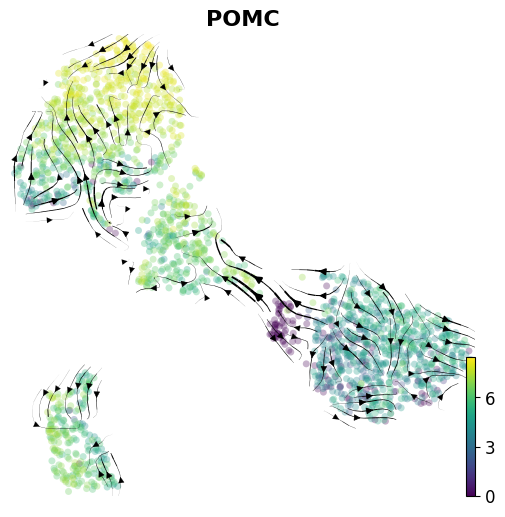

In [29]:
#embed RNA velocity over UMAP of gene expression of POMC
fig, ax1 = pl.subplots(1,1,figsize=(6,6))
ax1_dict = vk.plot_projection( color="POMC", size = 100, 
                   legend_loc='best',fontsize=16, legend_fontoutline = 5, ax= ax1, show= False)
ax1.set_title("POMC", fontweight="bold", fontsize=16)
pl.savefig("POMC_RNA_Velocity.png")

Using precomputed projection `adata.obsm['T_fwd_umap']`


/Users/bhattda/anaconda3/envs/cellrank/lib/python3.10/site-packages/scvelo/plotting/utils.py:869: MatplotlibDeprecationWarning: The draw_all function was deprecated in Matplotlib 3.6 and will be removed two minor releases later. Use fig.draw_without_rendering() instead.
  cb.draw_all()


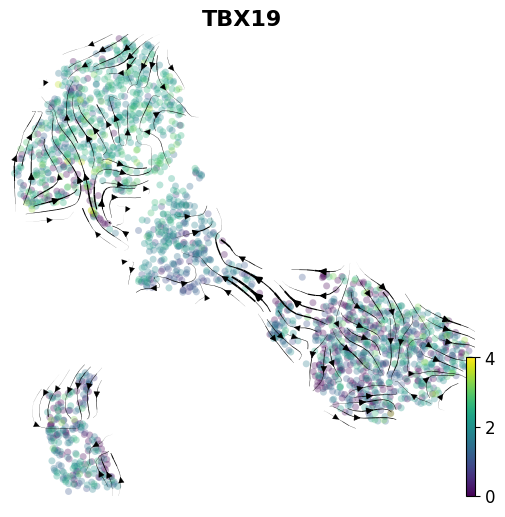

In [30]:
#embed RNA velocity over UMAP of gene expression of TBX19
fig, ax1 = pl.subplots(1,1,figsize=(6,6))
ax1_dict = vk.plot_projection( color="TBX19", size = 100, 
                   legend_loc='best',fontsize=16, legend_fontoutline = 5, ax= ax1, show= False)
ax1.set_title("TBX19", fontweight="bold", fontsize=16)
pl.savefig("TBX19_RNA_Velocity.png")

In [31]:
g = cr.estimators.GPCCA(vk)
print(g)


GPCCA[kernel=VelocityKernel[n=2022], initial_states=None, terminal_states=None]


/Users/bhattda/anaconda3/envs/cellrank/lib/python3.10/site-packages/anndata/_core/anndata.py:1828: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/Users/bhattda/anaconda3/envs/cellrank/lib/python3.10/site-packages/anndata/_core/anndata.py:1828: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


<font size="5">Compute Macrostates</font>

Computing Schur decomposition
Adding `adata.uns['eigendecomposition_fwd']`
       `.schur_vectors`
       `.schur_matrix`
       `.eigendecomposition`
    Finish (0:00:03)
Computing `7` macrostates
Adding `.macrostates`
       `.macrostates_memberships`
       `.coarse_T`
       `.coarse_initial_distribution
       `.coarse_stationary_distribution`
       `.schur_vectors`
       `.schur_matrix`
       `.eigendecomposition`
    Finish (0:00:00)


/Users/bhattda/anaconda3/envs/cellrank/lib/python3.10/site-packages/scvelo/plotting/scatter.py:614: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  smp = ax.scatter(


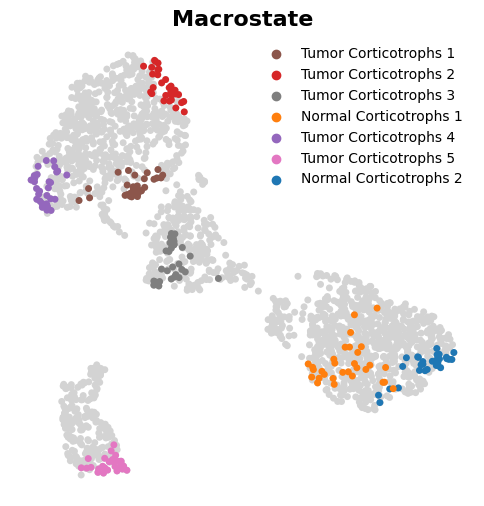

In [38]:
fig, ax1 = pl.subplots(1,1,figsize=(6,6))
g.fit(cluster_key="Type", n_states=7)
fig_kwargs = {"which":"all", 'legend_loc': 'best', 'discrete': True,'dpi':600, 
              'size': 100, "palette":color_macro, "ax":ax1, "show":False}
ax1_dict = g.plot_macrostates(**fig_kwargs)
ax1.set_title("Macrostate", fontweight="bold", fontsize=16)
pl.savefig("Macrostate.png")

In [39]:
adata.obs["macrostates"] = g.macrostates
g.macrostates_memberships.colors = color_macro[0:7]

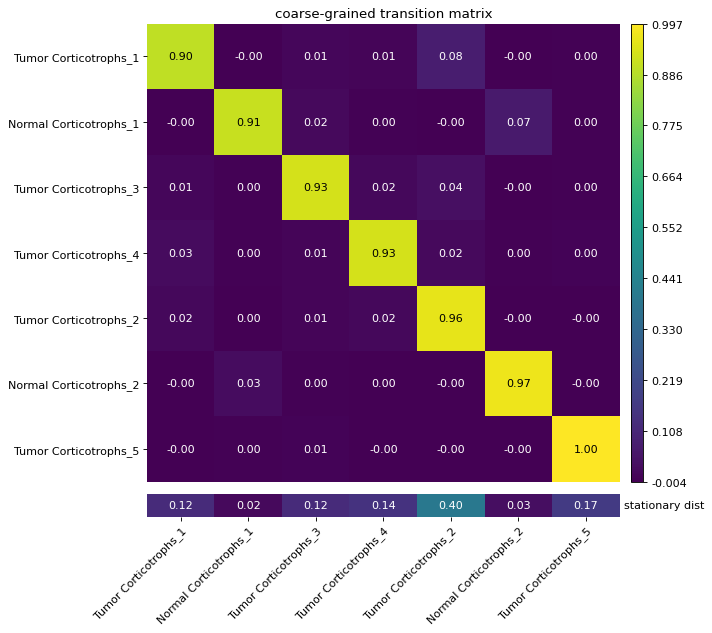

In [34]:
g.plot_coarse_T(save="macrostate_transition_matix.png")

<font size="5">Compute Terminal State</font>

Adding `adata.obs['term_states_fwd']`
       `adata.obs['term_states_fwd_probs']`
       `.terminal_states`
       `.terminal_states_probabilities`
       `.terminal_states_memberships
    Finish`


/Users/bhattda/anaconda3/envs/cellrank/lib/python3.10/site-packages/scvelo/plotting/scatter.py:614: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  smp = ax.scatter(


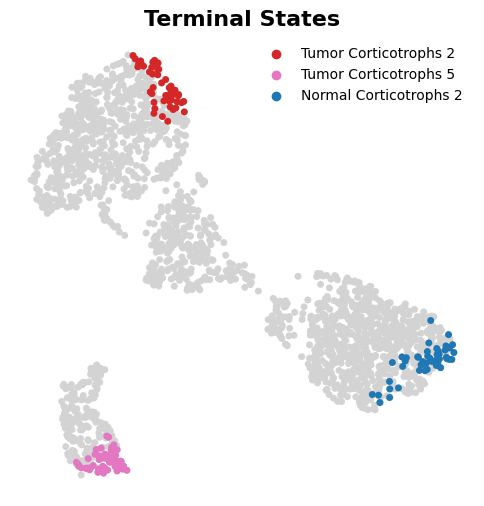

In [40]:
fig, ax1 = pl.subplots(1,1,figsize=(6,6))
g.predict_terminal_states(stability_threshold=0.95, n_cells=50, allow_overlap=True )
fig_kwargs = {"which":"terminal", 'legend_loc': 'best', 'discrete': True, 'dpi':600, 'size': 100, 
              "ax":ax1, "show":False}
g.plot_macrostates(**fig_kwargs)
ax1.set_title("Terminal States", fontweight="bold", fontsize=16)
pl.savefig("Terminal_States.png")

<font size="5">Compute Initial State</font>

Adding `adata.obs['init_states_fwd']`
       `adata.obs['init_states_fwd_probs']`
       `.initial_states`
       `.initial_states_probabilities`
       `.initial_states_memberships
    Finish`


/Users/bhattda/anaconda3/envs/cellrank/lib/python3.10/site-packages/scvelo/plotting/scatter.py:614: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  smp = ax.scatter(


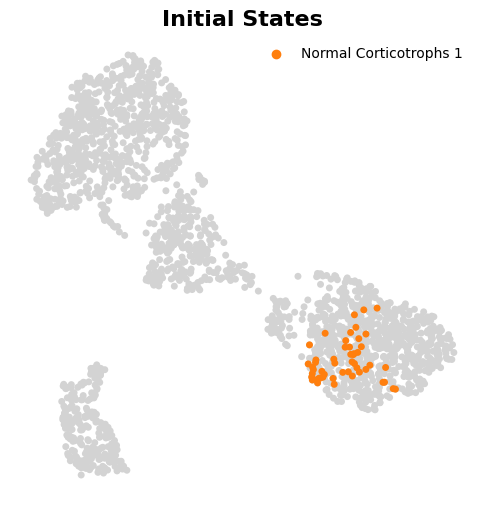

In [41]:
fig, ax1 = pl.subplots(1,1,figsize=(6,6))
g.predict_initial_states(n_states=1, n_cells= 50, allow_overlap=True)
fig_kwargs = {"which":"initial", 'legend_loc': 'best', 'discrete': True, 'dpi':600, 
              'size': 100, "ax":ax1, "show":False}

g.plot_macrostates(**fig_kwargs)
ax1.set_title("Initial States", fontweight="bold", fontsize=16)
pl.savefig("Initial_States.png", dpi=600)

<font size="5">Compute Fate Probabilities</font>

Computing fate probabilities
Defaulting to `'gmres'` solver.


  0%|          | 0/3 [00:00<?, ?/s]

Adding `adata.obsm['lineages_fwd']`
       `.fate_probabilities`
    Finish (0:00:00)


/Users/bhattda/anaconda3/envs/cellrank/lib/python3.10/site-packages/scvelo/plotting/utils.py:869: MatplotlibDeprecationWarning: The draw_all function was deprecated in Matplotlib 3.6 and will be removed two minor releases later. Use fig.draw_without_rendering() instead.
  cb.draw_all()


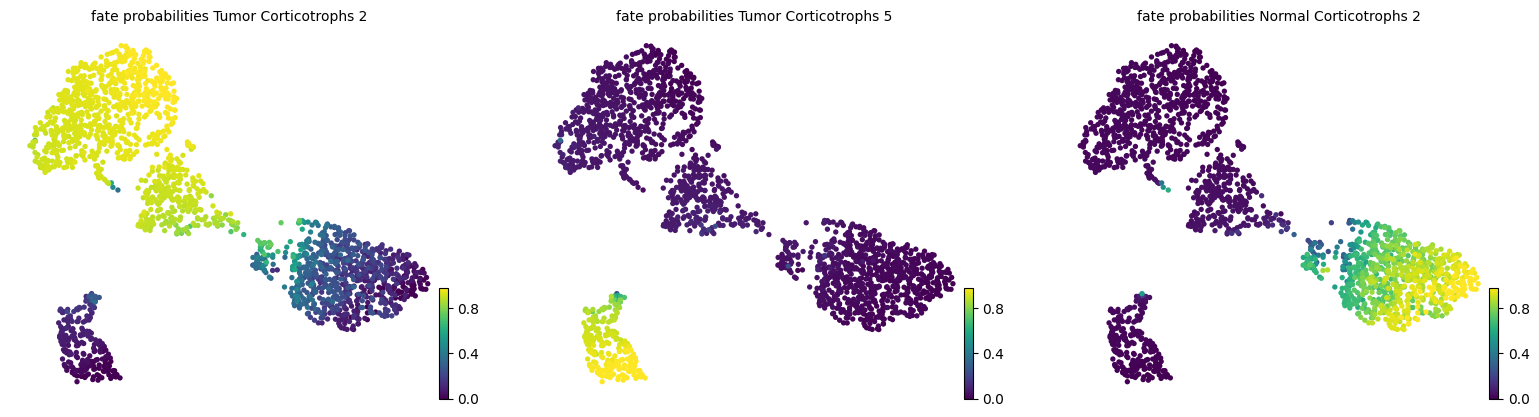

/Users/bhattda/anaconda3/envs/cellrank/lib/python3.10/site-packages/scvelo/plotting/scatter.py:614: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  smp = ax.scatter(
/Users/bhattda/anaconda3/envs/cellrank/lib/python3.10/site-packages/scvelo/plotting/scatter.py:614: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  smp = ax.scatter(


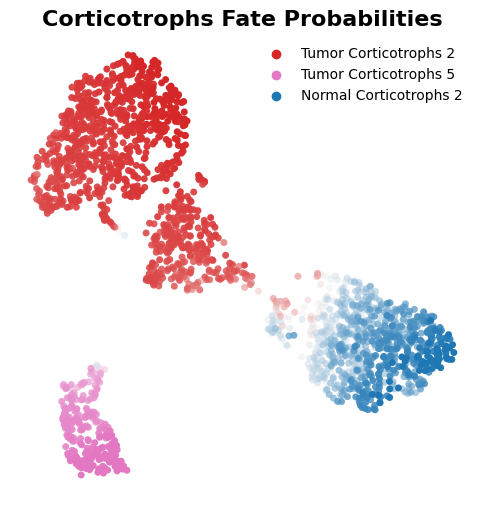

In [42]:
g.compute_fate_probabilities()
g.plot_fate_probabilities(same_plot=False)
fig, ax1 = pl.subplots(1,1,figsize=(6,6))
fig_kwargs = {"same_plot": True, 'legend_loc': 'best', 'dpi':600, 'size': 100, 
              "fontsize": 16, "ax":ax1, "show":False}
g.plot_fate_probabilities(**fig_kwargs)
ax1.set_title("Corticotrophs Fate Probabilities", fontweight="bold", fontsize=16)
pl.savefig("Fate_Probabilities.png", dpi=600)

<font size="5">Compute Lineage Gene Drivers</font>

In [45]:
driver_df= pd.DataFrame()
driver_df = g.compute_lineage_drivers(use_raw=True)
driver_df.to_csv("P2_merge_gene_drivers.csv")

Adding `adata.raw.varm['terminal_lineage_drivers']`
       `.lineage_drivers`
    Finish (0:00:00)


In [46]:
g.compute_lineage_drivers(['Normal Corticotrophs_2', 'Tumor Corticotrophs_2'], use_raw=True)

Adding `adata.raw.varm['terminal_lineage_drivers']`
       `.lineage_drivers`
    Finish (0:00:00)


Normal Corticotrophs_2_corr  Normal Corticotrophs_2_pval  \
GPC5                           0.742854                          0.0   
CDH20                          0.711856                          0.0   
CNTN5                          0.706629                          0.0   
CUX2                           0.704055                          0.0   
RSPO2                          0.692595                          0.0   
...                                 ...                          ...   
AC136616.2                          NaN                          NaN   
AC141272.1                          NaN                          NaN   
AC023491.2                          NaN                          NaN   
AC007325.1                          NaN                          NaN   
AC007325.2                          NaN                          NaN   

            Normal Corticotrophs_2_qval  Normal Corticotrophs_2_ci_low  \
GPC5                                0.0                       0.722664   
CDH20                               0.0                       0.689665   
CNTN5                               0.0                       0.684110   
CUX2                                0.0                       0.681375   
RSPO2                               0.0                       0.669208   
...                                 ...                            ...   
AC136616.2                          NaN                            NaN   
AC141272.1                          NaN                            NaN   
AC023491.2                          NaN                            NaN   
AC007325.1                          NaN                            NaN   
AC007325.2                          NaN                            NaN   

            Normal Corticotrophs_2_ci_high  Tumor Corticotrophs_2_corr  \
GPC5                              0.761778                   -0.892127   
CDH20                             0.732711                   -0.878326   
CNTN5                             0.727802                   -0.907114   
CUX2                              0.725384                   -0.807229   
RSPO2                             0.714612                   -0.863332   
...                                    ...                         ...   
AC136616.2                             NaN                         NaN   
AC141272.1                             NaN                         NaN   
AC023491.2                             NaN                         NaN   
AC007325.1                             NaN                         NaN   
AC007325.2                             NaN                         NaN   

            Tumor Corticotrophs_2_pval  Tumor Corticotrophs_2_qval  \
GPC5                               0.0                         0.0   
CDH20                              0.0                         0.0   
CNTN5                              0.0                         0.0   
CUX2                               0.0                         0.0   
RSPO2                              0.0                         0.0   
...                                ...                         ...   
AC136616.2                         NaN                         NaN   
AC141272.1                         NaN                         NaN   
AC023491.2                         NaN                         NaN   
AC007325.1                         NaN                         NaN   
AC007325.2                         NaN                         NaN   

            Tumor Corticotrophs_2_ci_low  Tumor Corticotrophs_2_ci_high  
GPC5                           -0.900691                      -0.882870  
CDH20                          -0.887921                      -0.867966  
CNTN5                          -0.914542                      -0.899074  
CUX2                           -0.821900                      -0.791489  
RSPO2                          -0.874030                      -0.851796  
...                                  ...                            ...  
AC136616.2

Adjusting text position


/Users/bhattda/anaconda3/envs/cellrank/lib/python3.10/site-packages/anndata/_core/anndata.py:1828: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/Users/bhattda/anaconda3/envs/cellrank/lib/python3.10/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Users/bhattda/anaconda3/envs/cellrank/lib/python3.10/site-packages/scanpy/plotting/_utils.py:724: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  sct = ax.scatter(


    Finish (0:00:01)


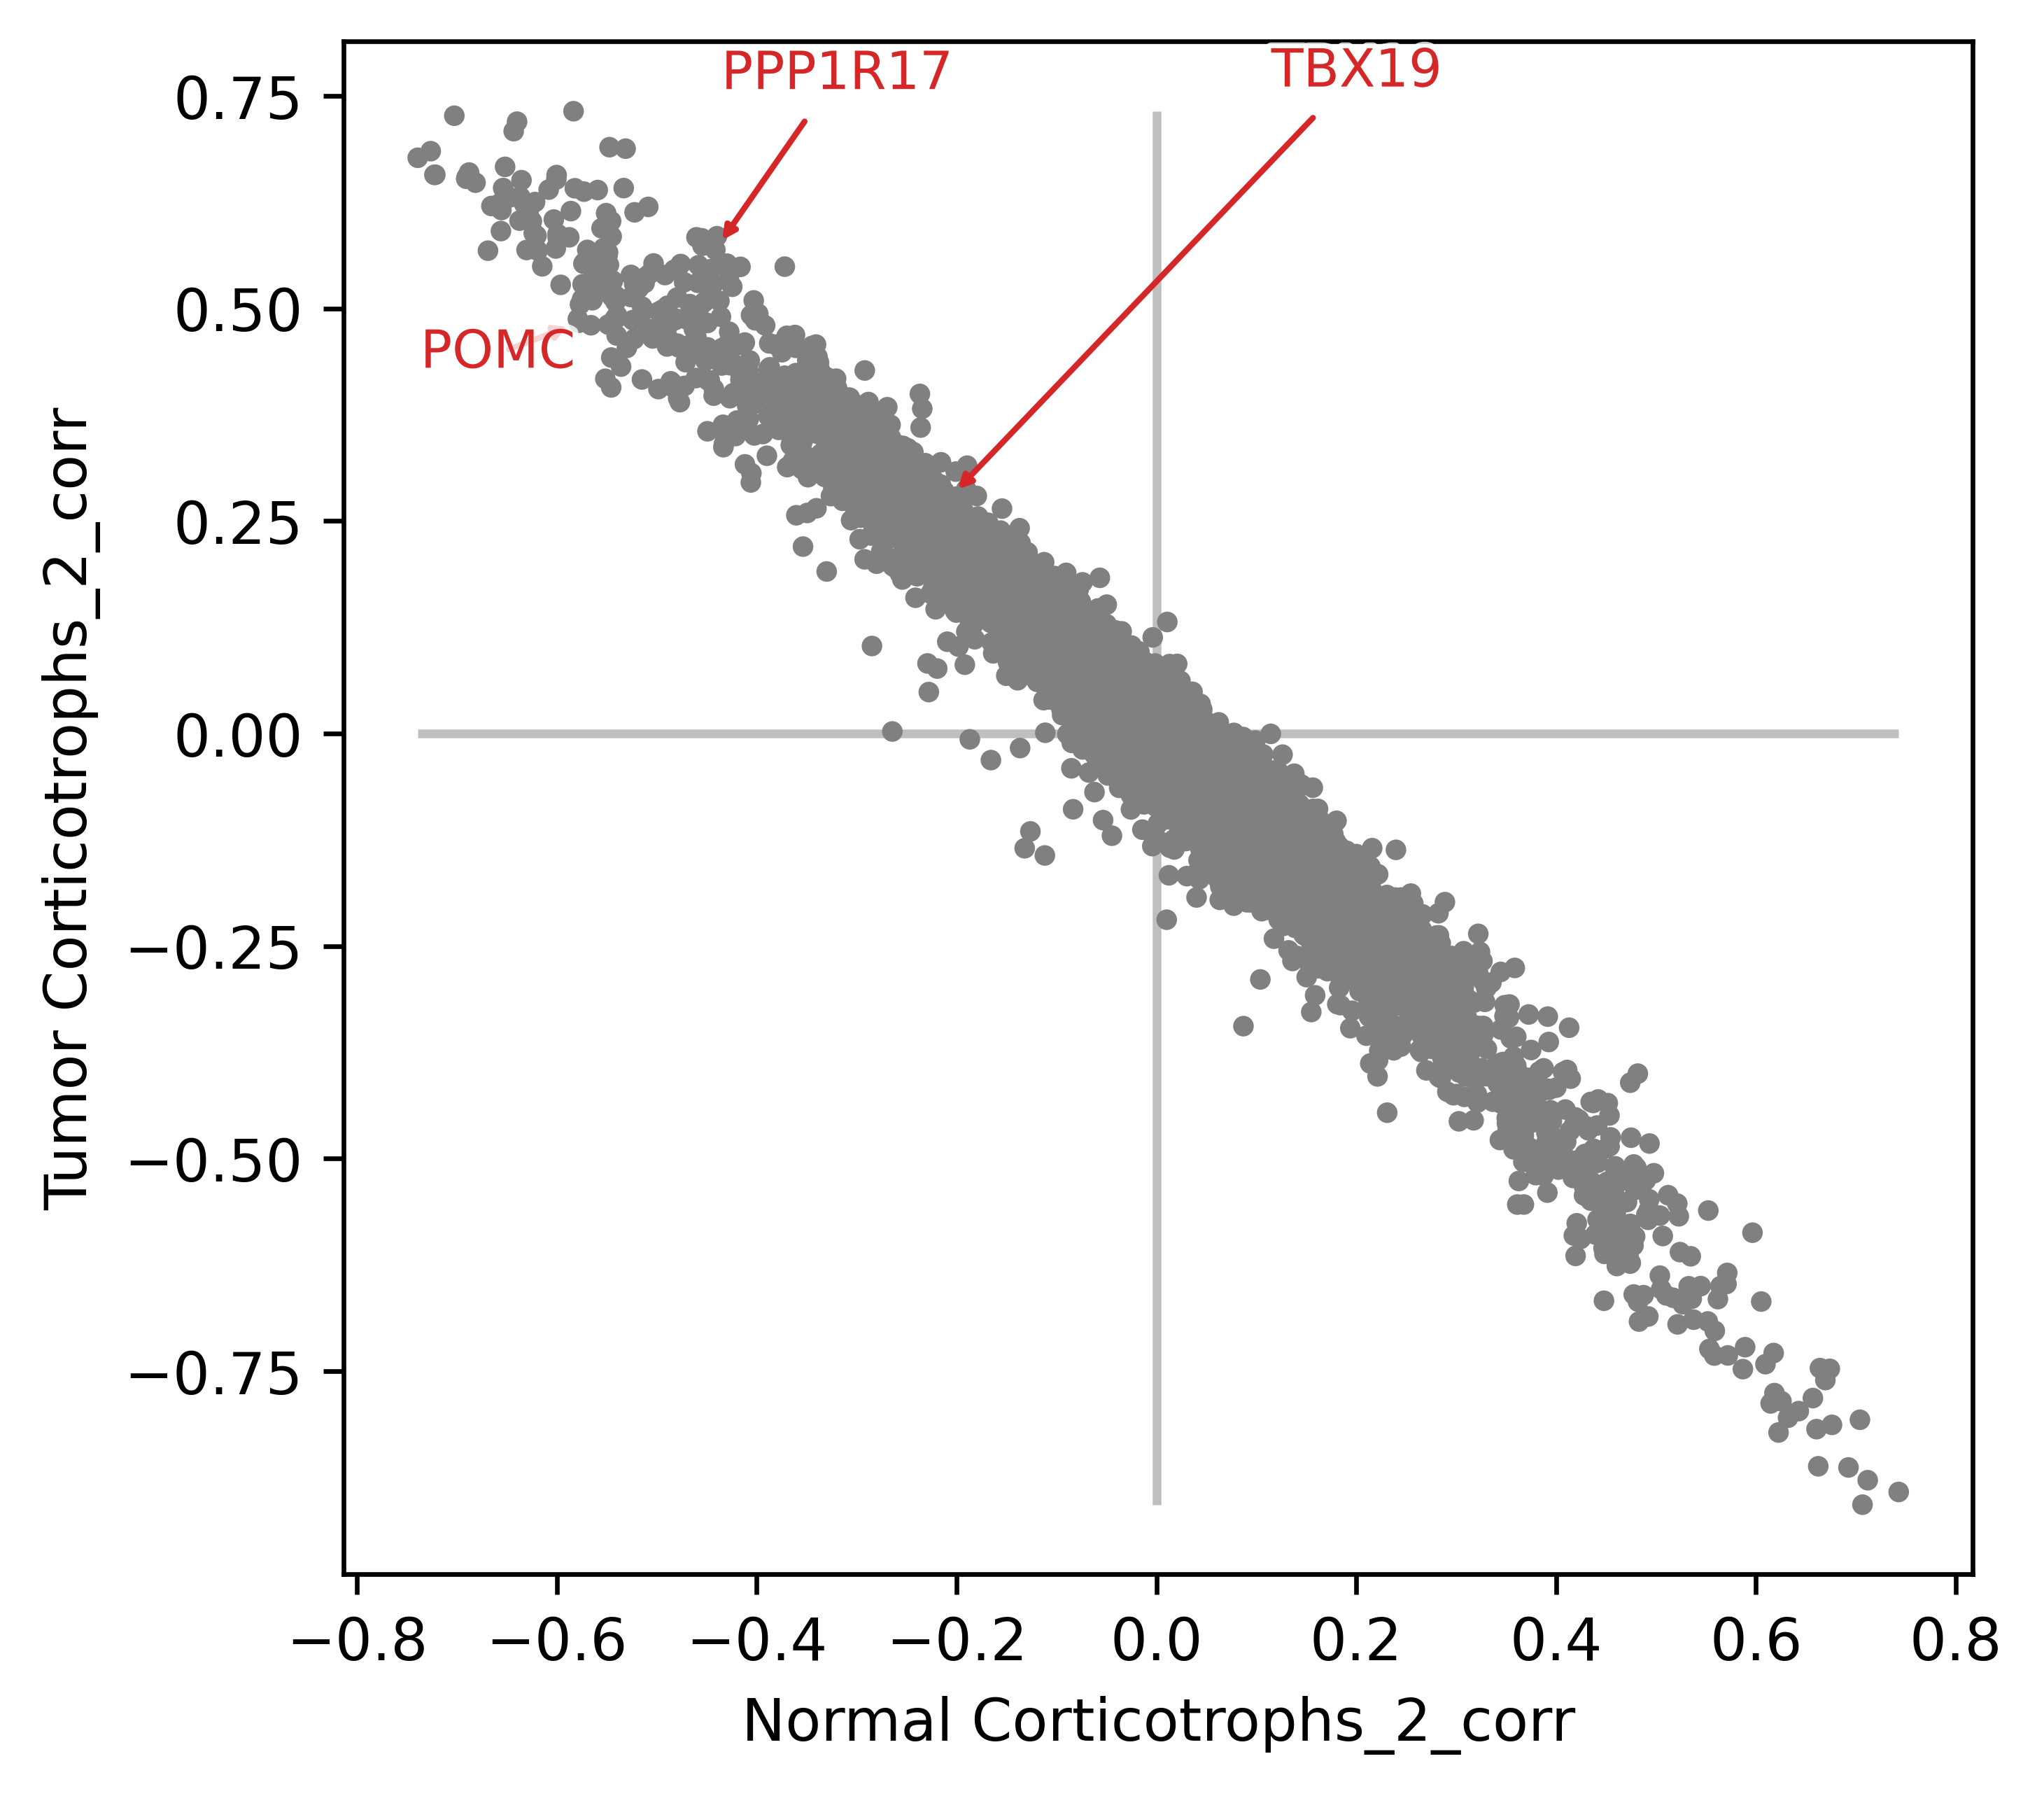

In [47]:
# visualize and highlight gene drivers in a scatter plot

Tumor_genes = ["POMC",  "PPP1R17", "TBX19"]

genes_oi = {
    "Tumor Corticotrophs_2": Tumor_genes,
    
}


assert [
    gene in adata.var_names for genes in genes_oi.values() for gene in genes
], "Did not find all genes"



g.plot_lineage_drivers_correlation(
    lineage_y="Tumor Corticotrophs_2",
    lineage_x="Normal Corticotrophs_2",
    adjust_text=True,
    gene_sets=genes_oi,
    legend_loc="none",
    figsize=(5, 5),
    dpi=600,
    fontsize=9,
    size=50,
    use_raw=True,
    save="gene_corr.png"
)

<font size="5">Compute Latent Time</font>

In [48]:

scv.tl.recover_latent_time(adata,end_key='term_states_fwd_probs',root_key="init_states_fwd_probs")


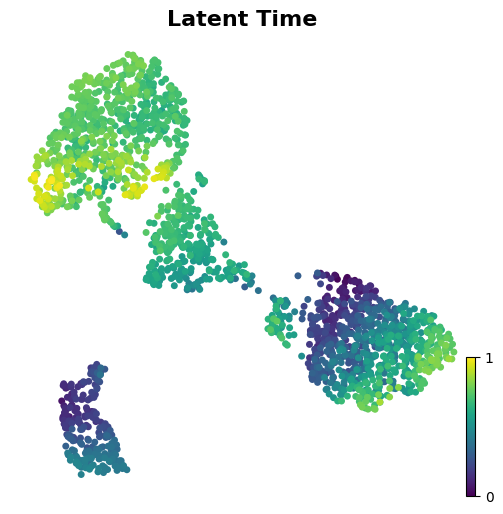

In [328]:
fig, ax1 = pl.subplots(1,1,figsize=(6,6))
ax1_dict = scv.pl.scatter(adata, color=['latent_time'], color_map='viridis', dpi=300, size=100, 
                          show = False, ax = ax1)
ax1.set_title("Latent Time", fontweight="bold", fontsize=16)
pl.savefig("Latent_Time.png")


<font size="5">Plot Lineage Gene Expression</font>

ERROR: Unable to duplicate function call using shadow `anndata.AnnData` object. Reason: `Lengths must match to compare`
Adding `adata.varm['terminal_lineage_drivers']`
       `.lineage_drivers`
    Finish (0:00:00)
Computing trends using `1` core(s)


  0%|          | 0/3 [00:00<?, ?gene/s]

/Users/bhattda/anaconda3/envs/cellrank/lib/python3.10/site-packages/anndata/_core/anndata.py:1828: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/Users/bhattda/anaconda3/envs/cellrank/lib/python3.10/site-packages/anndata/_core/anndata.py:1828: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/Users/bhattda/anaconda3/envs/cellrank/lib/python3.10/site-packages/anndata/_core/anndata.py:1828: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/Users/bhattda/anaconda3/envs/cellrank/lib/python3.10/site-packages/anndata/_core/anndata.py:1828: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/Users/bhattda/anaconda3/envs/cellrank/lib/python3.10/site-p

    Finish (0:00:01)
Plotting trends


/Users/bhattda/anaconda3/envs/cellrank/lib/python3.10/site-packages/anndata/_core/anndata.py:1828: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


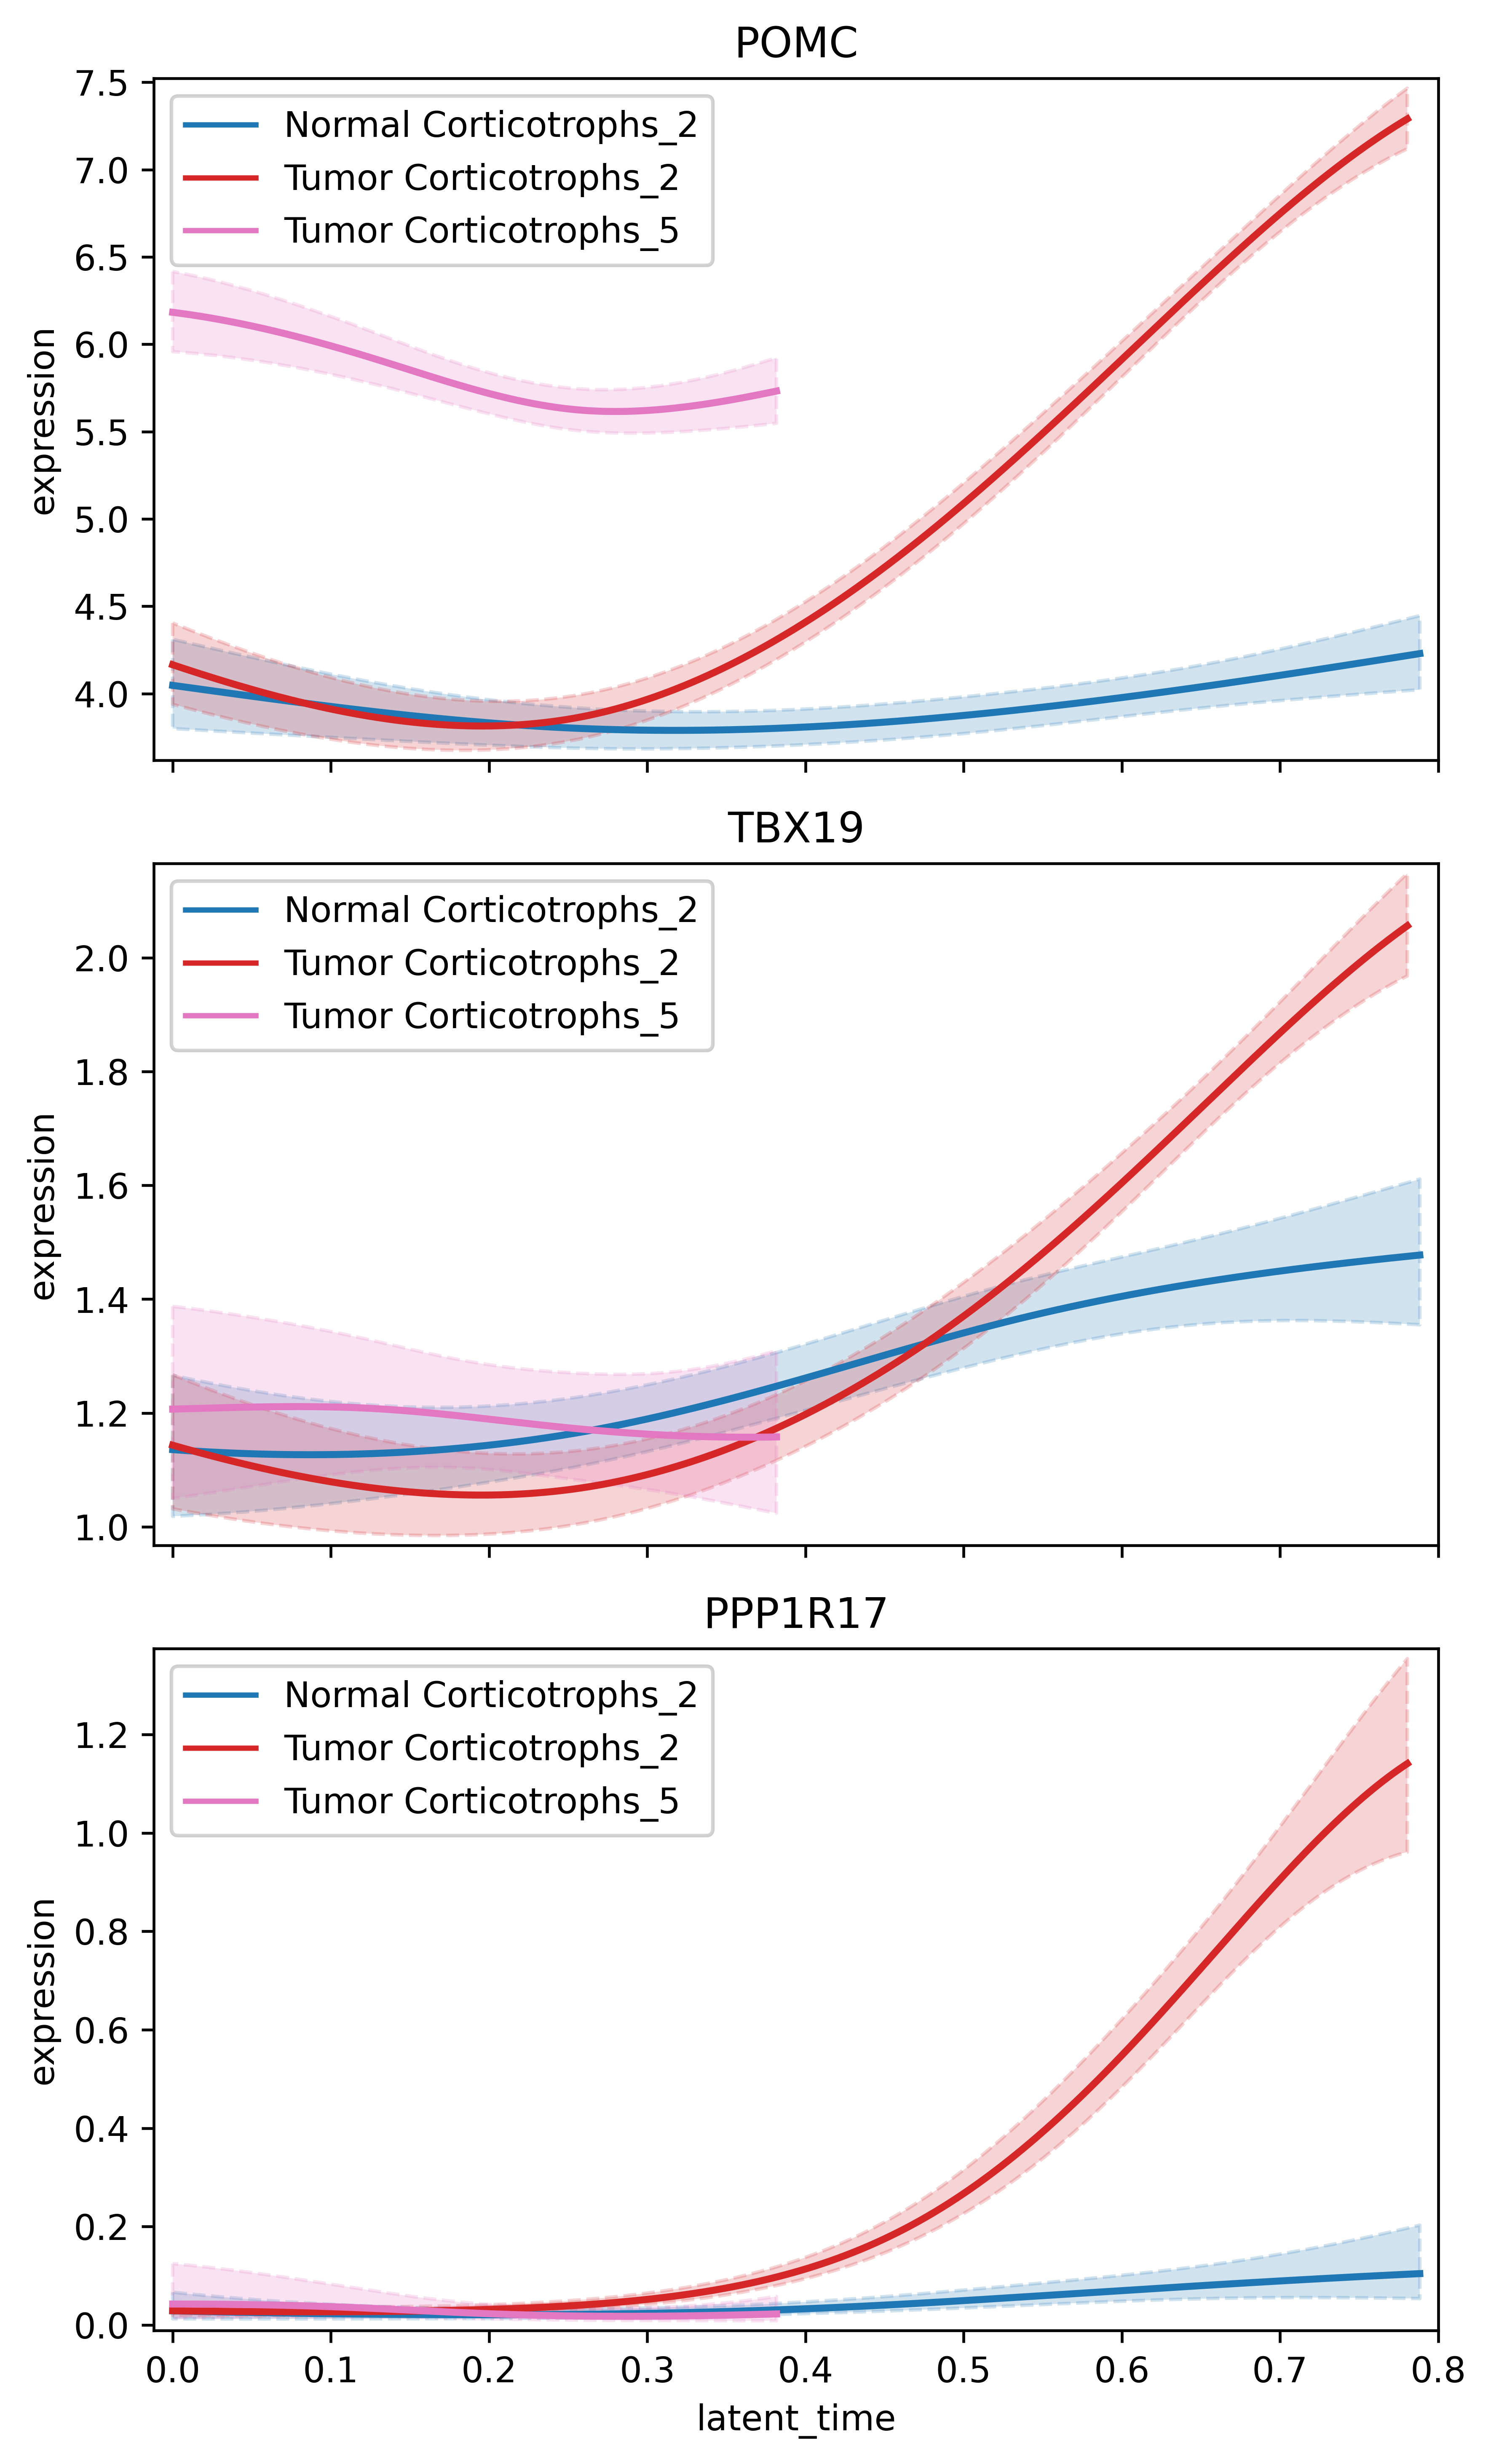

In [319]:
g.compute_lineage_drivers()
model = cr.models.GAM(adata)

cr.pl.gene_trends(
    adata,
    model=model,
    data_key="X",
    genes=["POMC", "TBX19",  "PPP1R17"],
    ncols=1,
    time_key="latent_time",
    same_plot=True,
    hide_cells=True,
    figsize=(6,10),
    n_test_points=500,
    use_raw=True,
    legend_loc="best",
    dpi =600,
    save="gene_trends.png"
    
)